# Stroke prediction: a machine learning approach

### Introduction
Stroke is the second leading cause of mortality globally, and fifth leading cause in the United States.1 Moreover, 60% of stroke deaths in the United States occur outside of an acute-care facility, indicating an opportunity for stroke education and risk prediction to improve treatment rate. We intend to use demographic information to output a risk score for a patient, allowing them to seek future medical care to improve outcomes.

### Dataset

We used the Stroke Dataset posted on Kaggle, that contains information from 43,400 people with 11 different classifiers, including whether or not the patient suffered from a stroke. The demographic classifiers associated with each patient include gender of patient, age of patient, presence of hypertension, presence of heart disease, marital status, type of occupation, area type of residence , average glucose, BMI, and smoking status. Unfortunately, there is not any information as to and where this data was taken, and by whom and for what purpose. The dataset was put online for public use on April 16, 2018.

In [10]:
import pandas as panda
import numpy as numpy
import seaborn as seaborn
import matplotlib.pyplot as matplotlib
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

categories=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
quantative=['age', 'avg_glucose_level', 'bmi']

#load the data set that is provided
training_set=panda.read_csv("train_2v.csv")
training_set_normalized=panda.read_csv("train_2v.csv")

#print number of entries that are complete
print("Total number of entries:")
print(len(training_set.index))


#remove any null entries
training_set=training_set.dropna()
training_set_normalized=training_set_normalized.dropna()

#print number of entries that are complete
print("Number of complete entries:")
print(len(training_set.index))

#Pre-Processing Normalize quantative variables to unit vector
columns_to_normalize = ['bmi', 'age', 'avg_glucose_level']
data_to_normalize= training_set_normalized[columns_to_normalize].values
normalized_data = preprocessing.normalize(data_to_normalize)
df_temp = panda.DataFrame(normalized_data, columns=columns_to_normalize, index = training_set.index)
training_set_normalized[columns_to_normalize] = df_temp

Total number of entries:
43400
Number of complete entries:
29072


# Function to expore the data

This function is used to investigate balance of our dataset, as well as provide some insight into the single varible stroke correlations 

In [11]:
#Data Exploration Function
def explore_data(data):
    #Print Column Names
    print("Column Names of Training Set:")
    print(data.columns)


   # #Print summary statistic for each variable in the training set
   # for variable in data.columns:
   #     print(data[variable].describe())

    #Plot bar chart of each category to visualize balance
    for category in categories:
        print("Balance of " + str(category))
        seaborn.countplot(data[category])
        matplotlib.show()

    #Plot distribution chart of each category to visualize balance
    for quant in quantative:
        print("Distribution of " + str(quant))
        seaborn.distplot(data[quant])
        matplotlib.show()

    #Correlation Matrix
    print("Correlation Matrix")
    data_correlation = data.corr()
    f, ax = matplotlib.subplots(figsize=(12, 9))
    seaborn.heatmap(data_correlation, vmax=.8, square=True)
    matplotlib.show()
    
    
    #Investigate balance of stroke incidence across gender
    print("Balance of stroke incidence across gender")
    mosaic(data, ['gender','stroke'], axes_label=True)
    matplotlib.show()

    #Investigate balance of stroke incidence across hypertension
    print("Balance of stroke incidence across hypertension")
    mosaic(data, ['hypertension','stroke'], axes_label=True)
    matplotlib.show()

    #Investigate balance of stroke incidence across heart disease
    print("Balance of stroke incidence across heart disease")
    mosaic(data, ['heart_disease','stroke'], axes_label=True)
    matplotlib.show()

    #Investigate stroke across blood glucose
    print("Balance of stroke incidence across blood glucose level")
    stroke_and_bgl= panda.concat([data['avg_glucose_level'], data['stroke']], axis=1)
    f, ax = matplotlib.subplots(figsize=(8, 6))
    fig = seaborn.boxplot(x="stroke", y="avg_glucose_level", data=stroke_and_bgl)
    matplotlib.show()

    #Investigate stroke across age
    print("Balance of stroke incidence across age")
    stroke_and_age= panda.concat([data['age'], data['stroke']], axis=1)
    f, ax = matplotlib.subplots(figsize=(8, 6))
    fig = seaborn.boxplot(x="stroke", y="age", data=stroke_and_age)
    matplotlib.show()


# Data exploration of training_set

Column Names of Training Set:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Balance of gender


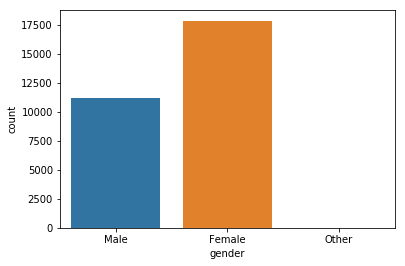

Balance of hypertension


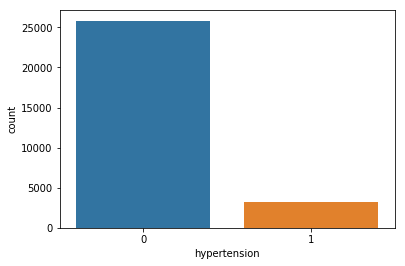

Balance of heart_disease


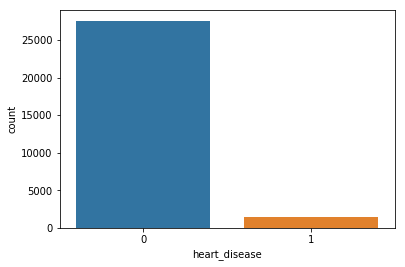

Balance of ever_married


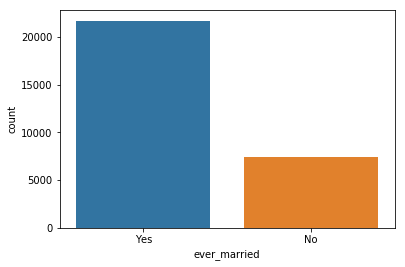

Balance of work_type


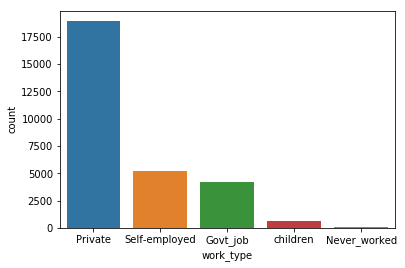

Balance of Residence_type


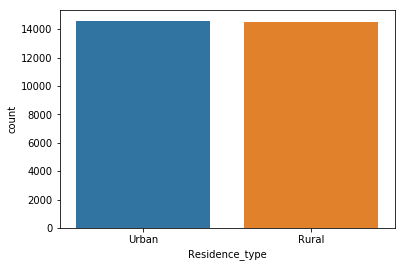

Balance of smoking_status


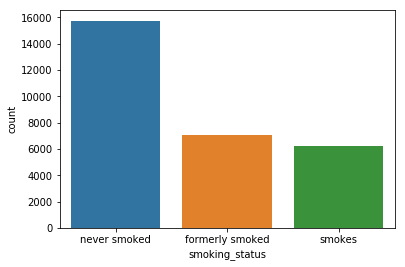

Balance of stroke


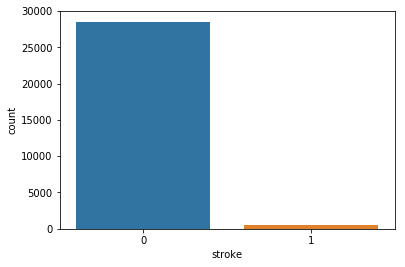

Distribution of age


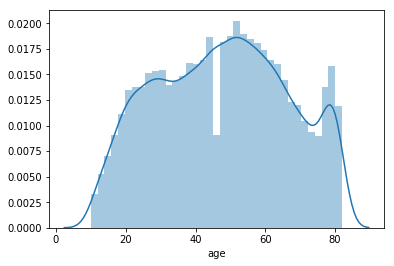

Distribution of avg_glucose_level


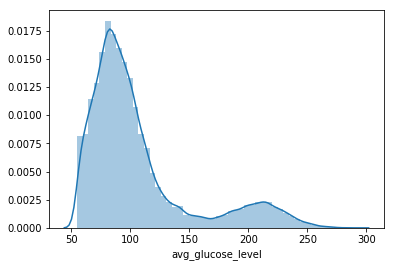

Distribution of bmi


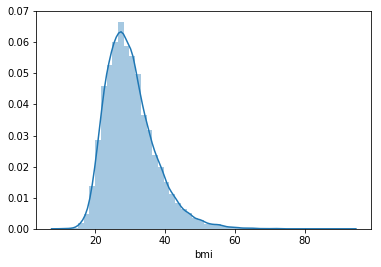

Correlation Matrix


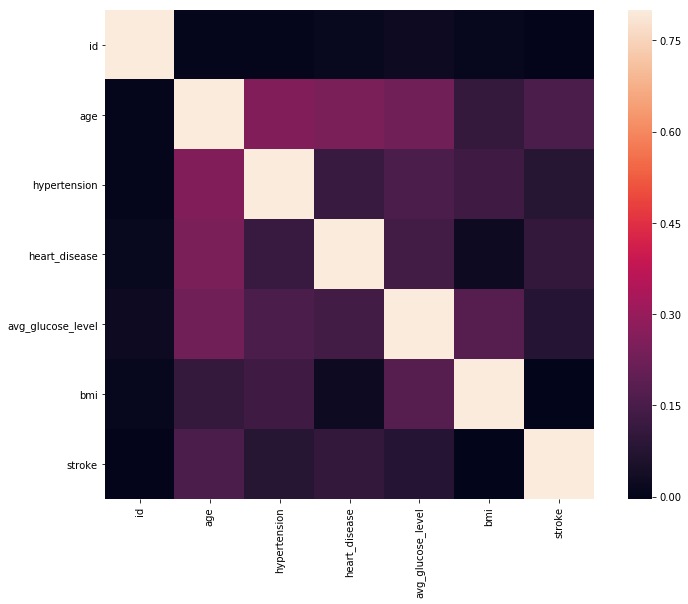

Balance of stroke incidence across gender


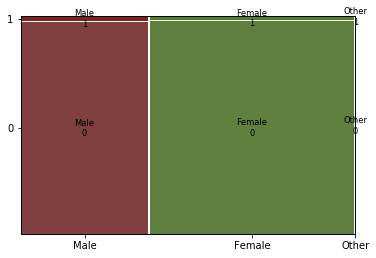

Balance of stroke incidence across hypertension


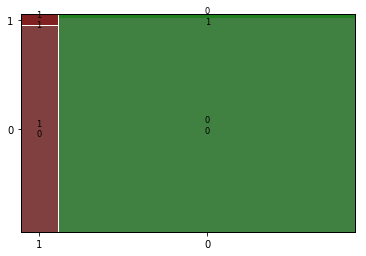

Balance of stroke incidence across heart disease


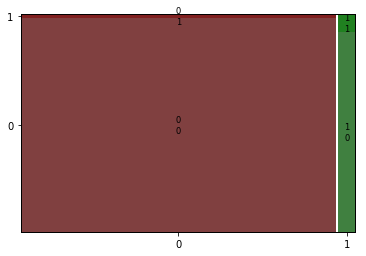

Balance of stroke incidence across blood glucose level


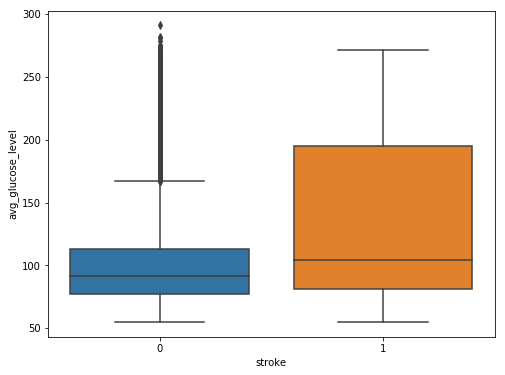

Balance of stroke incidence across age


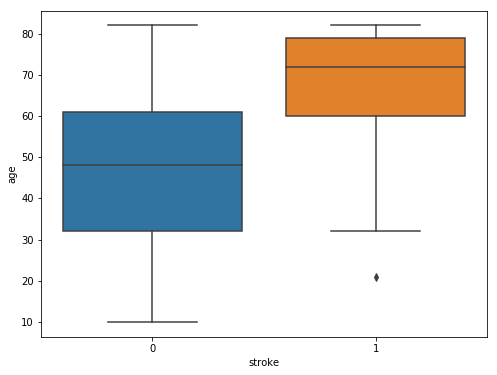

In [12]:
#explore data on the orginal complete set
explore_data(training_set)

# Data exploration of our normalized training_set

Column Names of Training Set:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Balance of gender


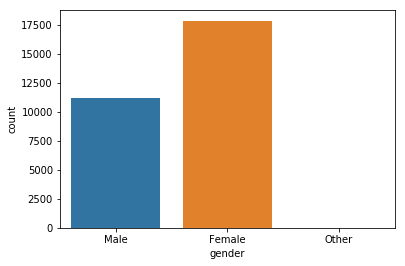

Balance of hypertension


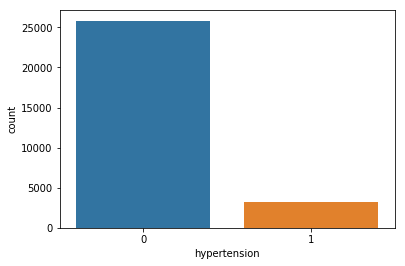

Balance of heart_disease


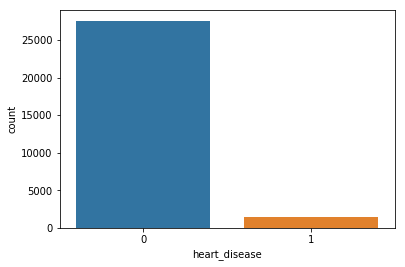

Balance of ever_married


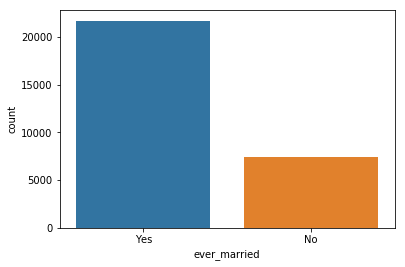

Balance of work_type


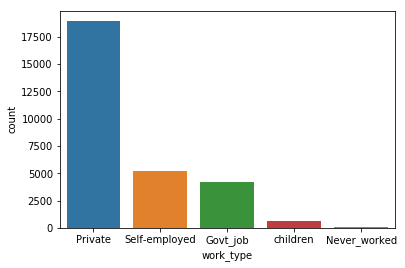

Balance of Residence_type


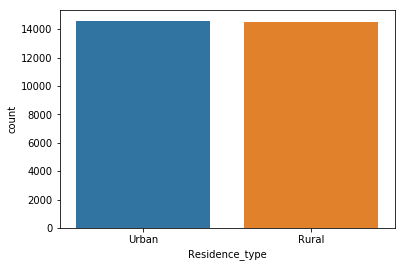

Balance of smoking_status


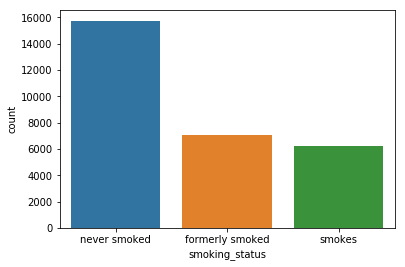

Balance of stroke


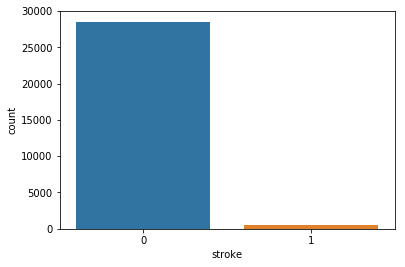

Distribution of age


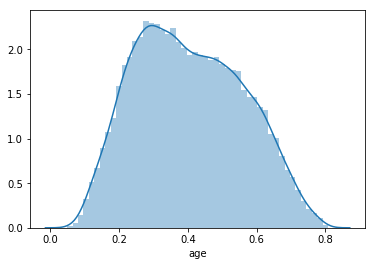

Distribution of avg_glucose_level


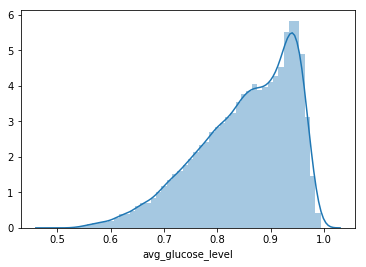

Distribution of bmi


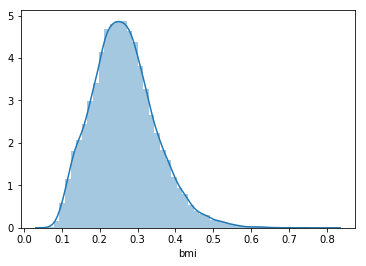

Correlation Matrix


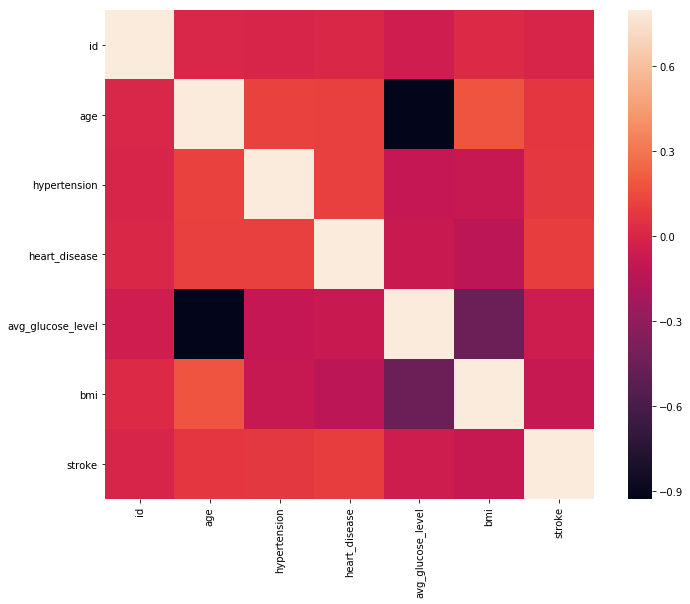

Balance of stroke incidence across gender


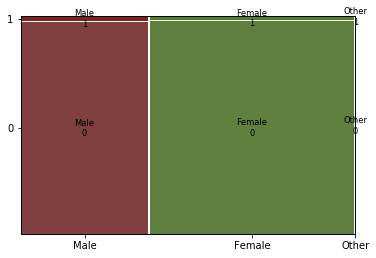

Balance of stroke incidence across hypertension


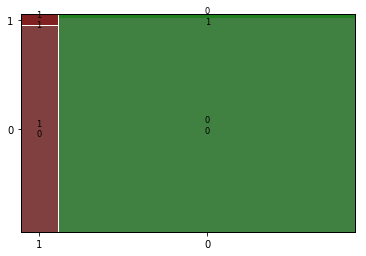

Balance of stroke incidence across heart disease


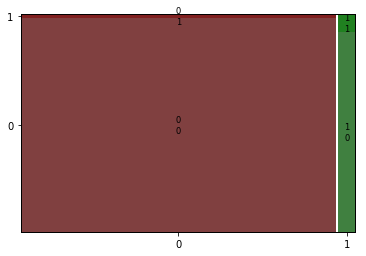

Balance of stroke incidence across blood glucose level


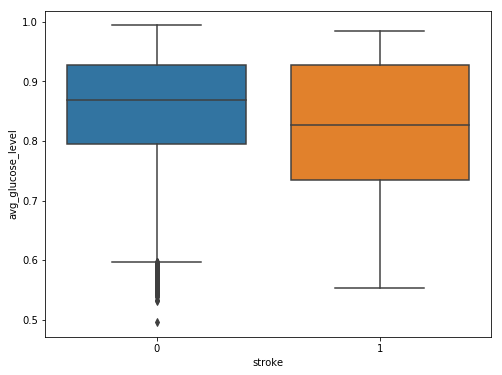

Balance of stroke incidence across age


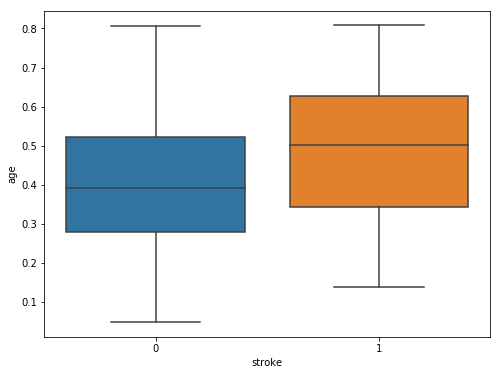

In [13]:
#explore data on the normalized set
explore_data(training_set_normalized)

# Preprocessing for machine learning exploration

In [14]:


#Pre-Processing: convert catageorical variables into dummy variables
training_set_dummies=panda.get_dummies(training_set)

#rename columns to avoid spaces
training_set_dummies.rename(columns={'smoking_status_never smoked': 'smoking_status_never_smoked', 'smoking_status_formerly smoked': 'smoking_status_formerly_smoked'}, inplace=True)

#Split Training and Test Sets
stroke = training_set_dummies.stroke # define stroke as the dependent variable
features=training_set_dummies.loc[:,["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "gender_Female",
                             "gender_Male", "gender_Other", "ever_married_No", "ever_married_Yes", 'work_type_Govt_job',
                             'work_type_Never_worked', 'work_type_Private''work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
                             'Residence_type_Urban', 'smoking_status_formerly_smoked','smoking_status_never_smoked', 'smoking_status_smokes']]

#Create training and testing vars
features_train, features_test, stroke_train, stroke_test = train_test_split(features, stroke, test_size=0.33)



# Where are we going from here?

### Model Choice
We will be exploring the use of a naive bayes classifier, logistical regression, random forests and a neural network to determine which is most effective aty determining stroke risk

### Model Assesment 
For consistency, we use all of the inputs for each model. We evaluate the effectiveness of each model utilizing traditional assessment methods binary classification models, including ROC, precision, accuracy, and F1 score. We also define a novel metric to assess the probabilities of our model, which captures the average absolute difference between the probability of stroke depicted by a given model and the probability of stroke under the assumption of a uniform distribution for a given set of patient characteristics:



This metric is intended to capture the reasonableness of the probabilities that are generated by our models, but it is not meant to measure the absolute success of our models.
